In [1]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import*
import numpy as np
import scipy.stats 
from scipy.special import gamma
import seaborn as sns
from scipy.stats import beta
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
data_schools_df = pd.read_excel("data_schools.xlsx")
data_schools_df.head()

,escuela,LSAT,GPA
0,1,622,3.23
1,2,542,2.83
2,3,579,3.24
3,4,653,3.12
4,5,606,3.09


In [3]:
data_schools_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   escuela  82 non-null     int64  
 1   LSAT     82 non-null     int64  
 2   GPA      82 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 2.0 KB


### Tenemos 82 escuelas

In [4]:
print(f"La media para LSAT es : {data_schools_df['LSAT'].mean()}")

La media para LSAT es : 597.5487804878048


In [5]:
print(f"La media para GPA es : {data_schools_df['GPA'].mean()}")

La media para GPA es : 3.1348780487804877


In [6]:
# Primero crearemos una función para generar muestras boostrap de tamaño n

def create_sample(n, m, data_frame):
    sample = []
    for i in range(n):
        si = data_frame.sample(n=m, replace=True)
        spearmanr_si = spearmanr(si.LSAT, si.GPA)[0]
        
        sample.append(spearmanr_si)
        
    return sample

El error estandar para la muestra 1 es: 0.12401628782381957


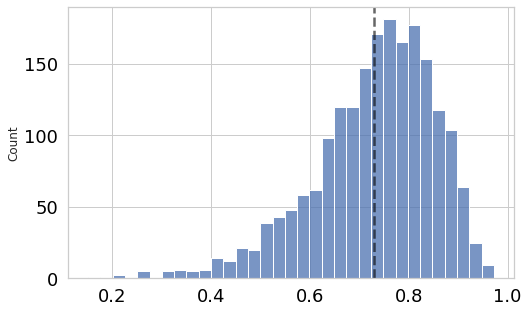

In [7]:
# Crearemos primero una muestra de tamaño n
n = 2000
m = 20
sample_1 = create_sample(n, m, data_schools_df)

fig, ax=subplots(figsize=(8,5))
sns.histplot(sample_1)
ax.xaxis.set_tick_params(labelsize=18,labelcolor="black")
ax.yaxis.set_tick_params(labelsize=18,labelcolor="black")
axvline(np.mean(sample_1),linestyle="--",color="black",linewidth=2.5,alpha=0.6,
        label="3.81")

err_std_sample_1 = np.std(sample_1)

print(f"El error estandar para la muestra 1 es: {err_std_sample_1}")

El error estandar para la muestra 1 es: 0.12270498815702333


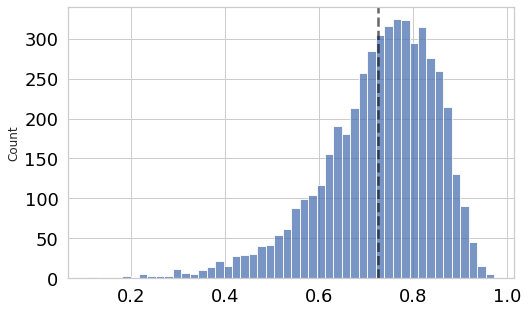

In [8]:
n = 5000
m = 20
sample_1 = create_sample(n, m, data_schools_df)

fig, ax=subplots(figsize=(8,5))
sns.histplot(sample_1)
ax.xaxis.set_tick_params(labelsize=18,labelcolor="black")
ax.yaxis.set_tick_params(labelsize=18,labelcolor="black")
axvline(np.mean(sample_1),linestyle="--",color="black",linewidth=2.5,alpha=0.6,
        label="3.81")

err_std_sample_1 = np.std(sample_1)

print(f"El error estandar para la muestra 1 es: {err_std_sample_1}")

$\textit{Se puede apreciar un comportamiento casi normal, pero ahora hagamos lo siguiente}$

$\textbf{Se generarán aleatoriamente N muestras bootstrap con remplazo para apreciar diferentes medias}$

In [9]:
# Primero haremos una función para crear un histrograma

def generate_hist(data):
    fig, ax=subplots(figsize=(8,5))
    sns.histplot(data)
    ax.xaxis.set_tick_params(labelsize=18,labelcolor="black")
    ax.yaxis.set_tick_params(labelsize=18,labelcolor="black")
    axvline(np.mean(data),linestyle="--",color="black",linewidth=2.5,alpha=0.6,
            label="3.81")

In [10]:
# Crearemos una función para obtener un nuevo DF de las muestras boostrap y hacer merge con la base original
def generate_boostrap_samples(k, m, data_frame):
    for i in range(k):
        new_sample = data_frame.sample(n=m)[["escuela"]]
        new_sample['muestra' + str(i+1)] = 1
        data_frame = pd.merge(data_frame, new_sample, how="left", on=["escuela"])
    
    data_frame = data_frame.fillna(0)
    return data_frame


In [11]:
data_schools_df1 = data_schools_df.copy() # Para no perder la original

data_schools_df1 = generate_boostrap_samples(20, 10, data_schools_df1) # Usamos primero 10 escuelas

In [12]:
data_schools_df1.head(8)

,escuela,LSAT,GPA,muestra1,muestra2,muestra3,muestra4,muestra5,muestra6,muestra7,...,muestra11,muestra12,muestra13,muestra14,muestra15,muestra16,muestra17,muestra18,muestra19,muestra20
0,1,622,3.23,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,542,2.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3,579,3.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,653,3.12,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,606,3.09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,6,576,3.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,7,620,3.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,8,615,3.40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Veamos la correlación con un histograma

def get_list_correlation(data_frame, k):
    data = []
    for i in range(k):
        si = spearmanr(data_frame[data_frame["muestra" + str(i+1)]==1].LSAT, data_frame[data_frame["muestra" + str(i+1)]==1].GPA)[0]        
        data.append(si)
    return data
                    

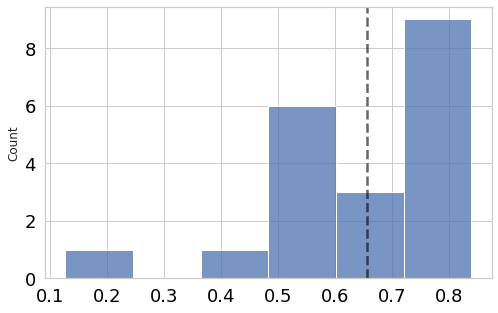

In [14]:
data_schools_df1_corr_list = get_list_correlation(data_schools_df1, 20)
generate_hist(data_schools_df1_corr_list)

In [15]:
# Ahora veamos para 9
data_schools_df2 = data_schools_df.copy() # Para no perder la original

data_schools_df2 = generate_boostrap_samples(20, 9, data_schools_df2)

In [16]:
data_schools_df2.head()

,escuela,LSAT,GPA,muestra1,muestra2,muestra3,muestra4,muestra5,muestra6,muestra7,...,muestra11,muestra12,muestra13,muestra14,muestra15,muestra16,muestra17,muestra18,muestra19,muestra20
0,1,622,3.23,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,542,2.83,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,579,3.24,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,653,3.12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,606,3.09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


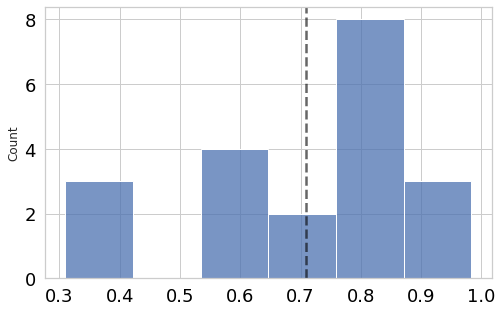

In [18]:
data_schools_df2_corr_list = get_list_correlation(data_schools_df2, 20)
generate_hist(data_schools_df2_corr_list)

### Podemos notar que hay más precencia de datos en 0.8

In [19]:
# Sólo falta ver el error estandar para N y N-1
# Los métodos de arriba hacen stack overflow cuando k o m es grande por lo cual haremos una función más simple la cual
# no hará merges

def get_sample_2(n, m, data_frame):
    sample = []
    for i in range(n):
        si = data_frame.sample(n=m, replace=True)
        si_j = si.sample(n=(m-1), replace=True)
        sample.append(spearmanr(si_j.LSAT, si_j.GPA)[0])
    
    return sample

Con m = 82 usando Bootstrap el error estandar es: 0.055926241432603926


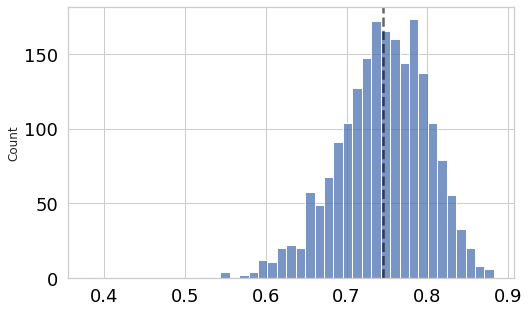

In [20]:
sample_1 = create_sample(2000, 82, data_schools_df) # Usando bootstrap n

generate_hist(sample_1)


err_sample_1 = np.std(sample_1)

print(f"Con m = 82 usando Bootstrap el error estandar es: {err_sample_1}")

Con m = 82 usando Bootstrap n-1 el error estandar es: 0.08219449890762467


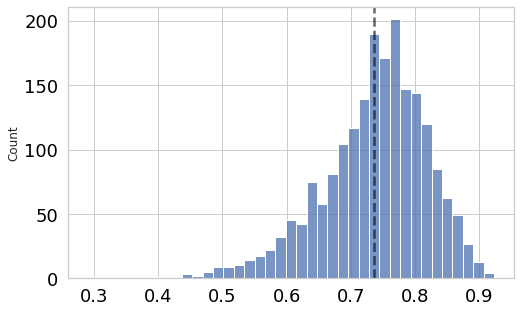

In [21]:
# Usando boostrap n-1
sample_2 = get_sample_2(2000, 82, data_schools_df) 

generate_hist(sample_2)


err_sample_2 = np.std(sample_2)

print(f"Con m = 82 usando Bootstrap n-1 el error estandar es: {err_sample_2}")